### Importing relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Loading the dataset

In [2]:
# Replace with the csv file
df = pd.read_csv("FuelConsumption (1).csv")
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


### Summary table

In [3]:
df.describe(include='all')

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639,639,639,639.000000,639.000000,639,639,639.000000,639.000000
unique,NaN,36,328,14,NaN,NaN,8,5,NaN,NaN
top,NaN,CHEVROLET,JETTA,COMPACT,NaN,NaN,A4,X,NaN,NaN
freq,NaN,63,6,105,NaN,NaN,324,454,NaN,NaN
mean,2000.0,NaN,NaN,NaN,3.265728,5.805947,NaN,NaN,14.713615,296.809077
std,0.0,NaN,NaN,NaN,1.231012,1.625588,NaN,NaN,3.307044,65.504178
min,2000.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.900000,104.000000
25%,2000.0,NaN,NaN,NaN,2.200000,4.000000,NaN,NaN,12.500000,253.000000
50%,2000.0,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,14.400000,288.000000
75%,2000.0,NaN,NaN,NaN,4.300000,6.000000,NaN,NaN,16.600000,343.000000


### Checking for null values

In [4]:
df.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

### Using data visualization techniques to analyze the relationships among variables

In [5]:
def scatterPlot(x,y, width, height, xticksRotations):
    
    colors = ['green' if value <= 200 else 'yellow' if (value > 200 and value<=400) else 'red' for value in df[y]]
    plt.figure(figsize=(width, height))
    plt.scatter(x=df[x], y=df[y], c=colors)
    if xticksRotations:
        plt.xticks(rotation=90)
    plt.title(f'Scatter plot against {x} and {y}')
    plt.show()

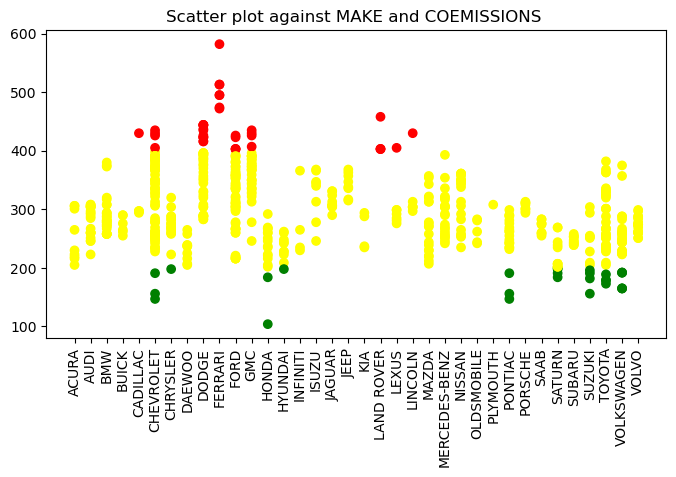

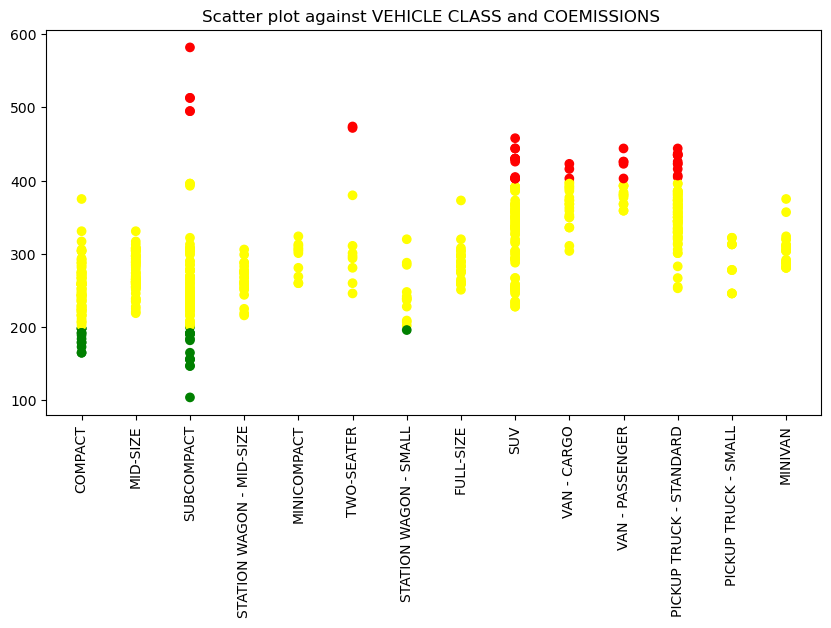

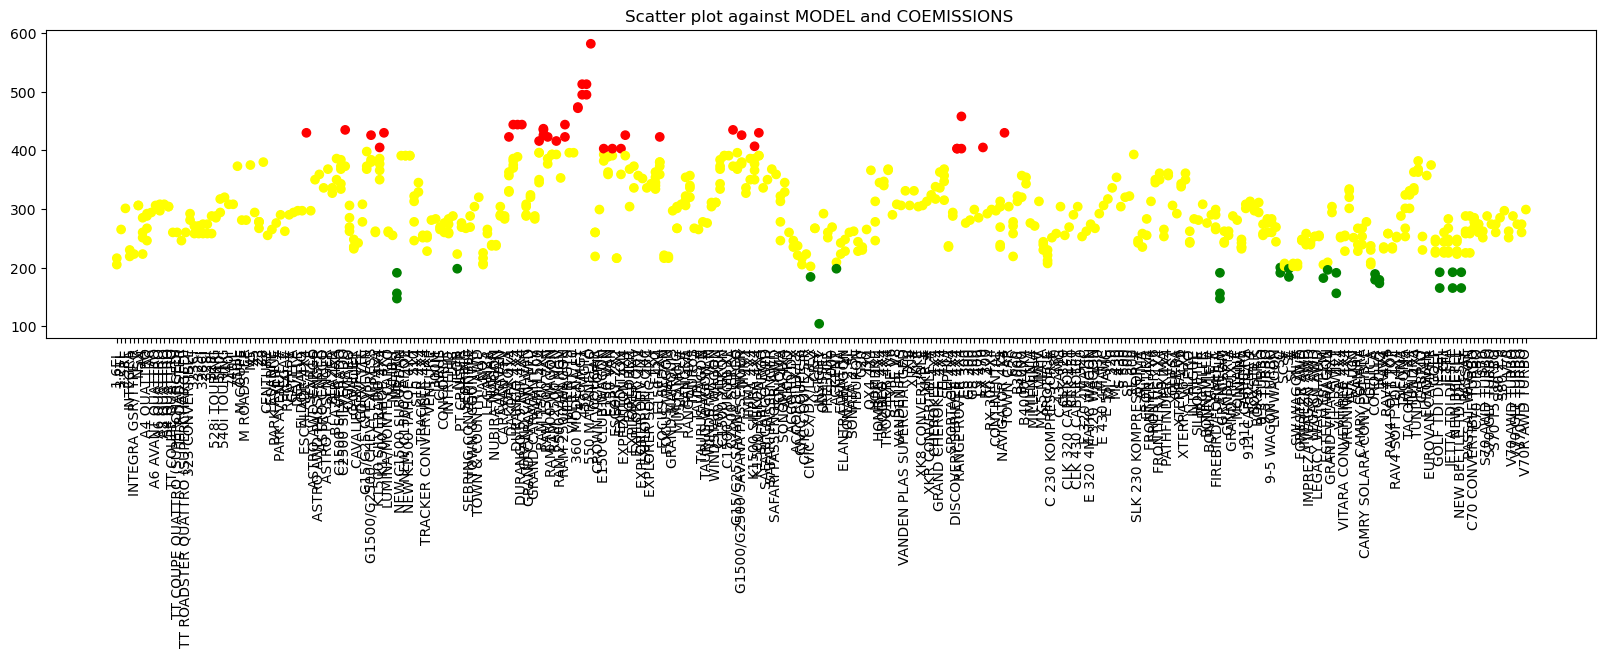

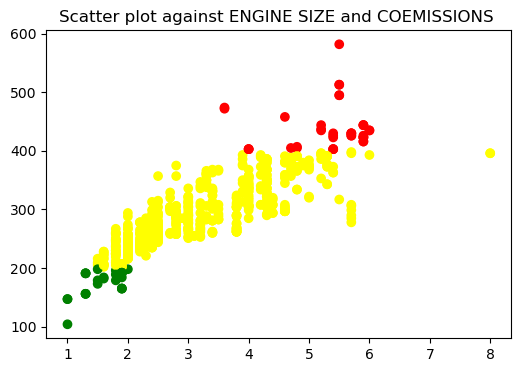

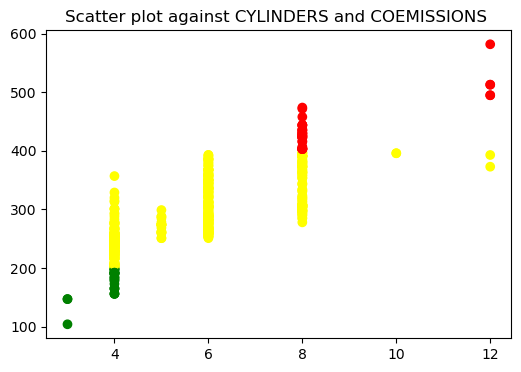

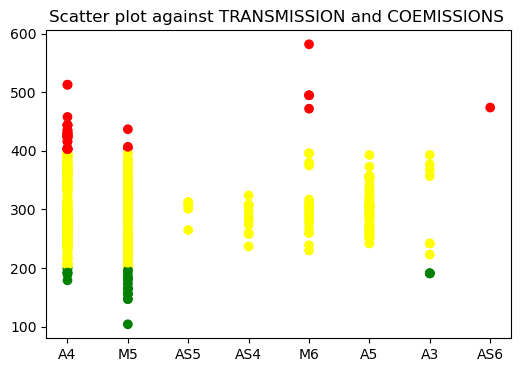

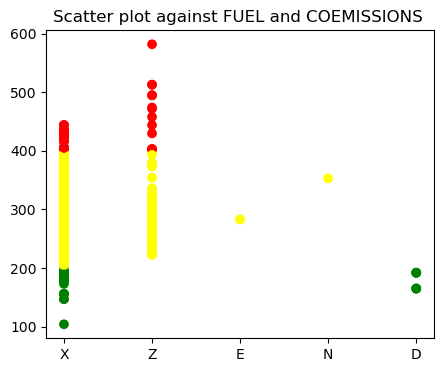

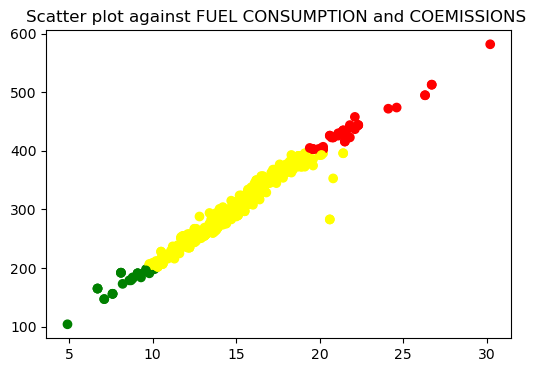

In [6]:
scatterPlot('MAKE', 'COEMISSIONS ', 8, 4, True)
scatterPlot('VEHICLE CLASS', 'COEMISSIONS ', 10, 5, True)
scatterPlot('MODEL', 'COEMISSIONS ', 20, 4, True)
scatterPlot('ENGINE SIZE', 'COEMISSIONS ', 6, 4, False)
scatterPlot('CYLINDERS', 'COEMISSIONS ', 6, 4, False)
scatterPlot('TRANSMISSION', 'COEMISSIONS ', 6,4, False)
scatterPlot('FUEL', 'COEMISSIONS ', 5,4, False)
scatterPlot('FUEL CONSUMPTION', 'COEMISSIONS ', 6,4, False)

From the graph, it can be observed that higher the engine size emits more CO2.

Also, the cars with 2 and 4 cylinders are more eco friendly whereas cars with 10 and 12 cylinders are harmful for environment

Also, the cars that consume more fuel tend to produce more CO2

### Pie chart to visualize the distribution of cars polluting the environment

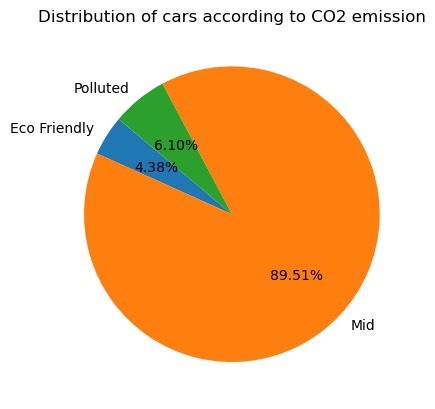

In [7]:
ecoFriendly_counts = df[df['COEMISSIONS ']<=200].shape[0]
mid_counts = df[(df['COEMISSIONS ']>200) & (df['COEMISSIONS ']<=400)].shape[0]
pollution_counts = df[(df['COEMISSIONS ']>400)].shape[0]
counts = [ecoFriendly_counts, mid_counts, pollution_counts]
labels = ['Eco Friendly', 'Mid', 'Polluted']

plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of cars according to CO2 emission')
plt.show()

### Distribution chart

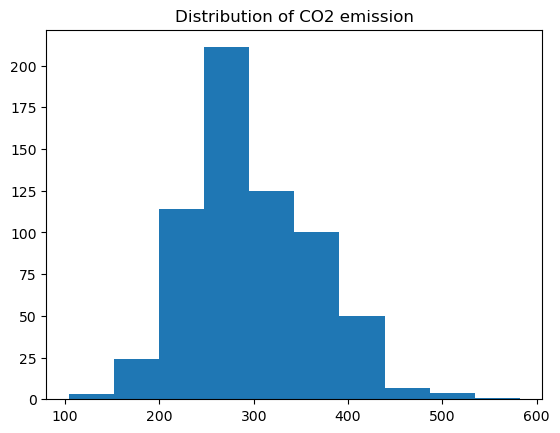

In [8]:
plt.hist(df['COEMISSIONS '])
plt.title('Distribution of CO2 emission')
plt.show()

After the analysis, we can see that using number of cylinders, engine size, and fuel consumption as inputs could be effective to predict the amount of CO2 emitted by the car.

And the relationship seems to be mostly linear, so we can build linear regression model.

### Model building

In [9]:
# defining a function to detect categorical columns
def detect_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

# defining a function to encode categorical columns using Label Encoder
def encode_categorical_columns(df):
    categorical_columns = detect_categorical_columns(df)
    le = LabelEncoder()
    df_encoded = df.copy()

    for col in categorical_columns:
        df_encoded[col] = df[col].astype(str)  
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

# Using the predefined function to encode categorical columns
df_encoded = encode_categorical_columns(df)
df_encoded

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,0,0,0,1.6,4,1,3,10.5,216
1,2000,0,0,0,1.6,4,6,3,9.8,205
2,2000,0,1,2,3.2,6,4,4,13.7,265
3,2000,0,2,2,3.5,6,1,4,15.0,301
4,2000,0,164,9,1.8,4,1,3,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,35,303,7,2.4,5,1,4,14.4,288
635,2000,35,304,7,2.4,5,1,4,13.6,274
636,2000,35,305,7,2.3,5,1,4,13.9,274
637,2000,35,305,7,2.3,5,6,4,13.0,260


### Plotting a correlation matrix using heatmap to see which columns can be used to detect the CO2 emitted accurately

<AxesSubplot:>

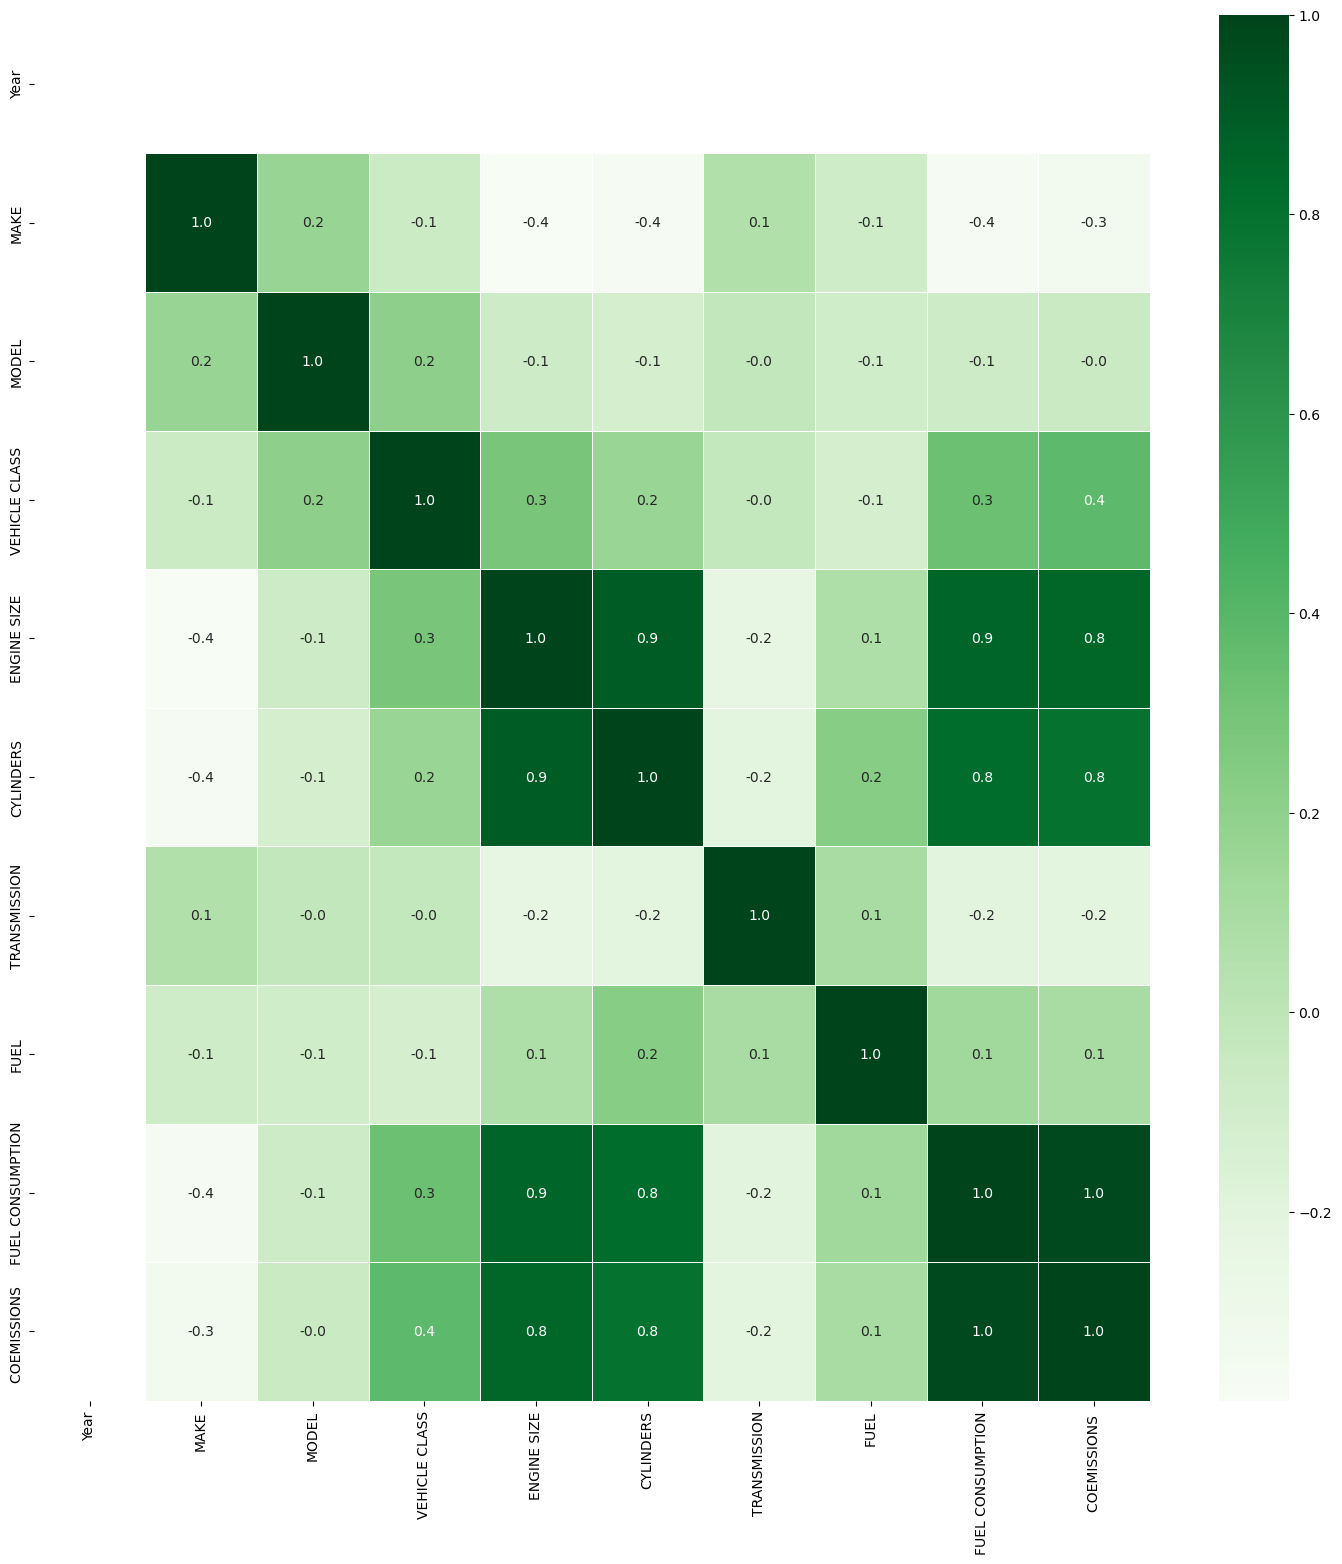

In [10]:
correlation_matrix = df_encoded.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Greens")

In [11]:
# Defining a function to build linear regression model, ridge model, and lasso model with custom input and target
def Model(input, target):
    X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2)
    
    linearReg = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()
    
    linearReg.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    linearReg_y_pred = linearReg.predict(X_test)
    ridge_y_pred = ridge.predict(X_test)
    lasso_y_pred = lasso.predict(X_test) 
    
    linearReg_r2 = (r2_score(y_test, linearReg_y_pred) * 100).round(2)   
    ridge_rmse = (np.sqrt(mean_squared_error(y_test,ridge_y_pred))).round(2)
    ridge_r2 = ((r2_score(y_test, ridge_y_pred))*100).round(2)
       
    lasso_rmse = (np.sqrt(mean_squared_error(y_test, lasso_y_pred))).round(2)
    lasso_r2 = ((r2_score(y_test, lasso_y_pred))*100).round(2)
    
    return linearReg_r2, ridge_rmse, ridge_r2, lasso_rmse, lasso_r2

In [12]:
# Separating the target variable
y = df_encoded['COEMISSIONS ']

### Passing every input variables to predict the amount of CO2 emitted

In [13]:
x = df_encoded.drop('COEMISSIONS ', axis=1)
linearRegR2_AllFeatures, ridgeRmse_AllFeatures, ridgeR2_AllFeatures, lassoRmse_AllFeatures, lassoR2_AllFeatures = Model(x,y)

print(f"R2 score of Linear Regression model build with all input variables is: {linearRegR2_AllFeatures}")
print(f"RMSE and R2 score of Ridge model build with all input variables is: {ridgeRmse_AllFeatures}, {ridgeR2_AllFeatures}")
print(f"RMSE and R2 score of Lasso model build with all input variables is: {lassoRmse_AllFeatures}, {lassoR2_AllFeatures}")

R2 score of Linear Regression model build with all input variables is: 98.27
RMSE and R2 score of Ridge model build with all input variables is: 9.87, 98.27
RMSE and R2 score of Lasso model build with all input variables is: 9.48, 98.41


### Passing EngineSize, Cylinders, FuelConsumption and VehicleClass as input variables to predict the amount of CO2 emitted

In [14]:
x = df_encoded[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'VEHICLE CLASS']]

linearRegR2_FewFeatures, ridgeRmse_FewFeatures, ridgeR2_FewFeatures, lassoRmse_FewFeatures, lassoR2_FewFeatures = Model(x,y)

print(f"R2 score of Linear Regression model build with EngineSize, Cylinders, FuelConsumption and VehicleClass as input variables is: {linearRegR2_FewFeatures}")
print(f"RMSE and R2 score of Ridge model build with all input variables is: {ridgeRmse_FewFeatures}, {ridgeR2_FewFeatures}")
print(f"RMSE and R2 score of Lasso model build with all input variables is: {lassoRmse_FewFeatures}, {lassoR2_FewFeatures}")

R2 score of Linear Regression model build with EngineSize, Cylinders, FuelConsumption and VehicleClass as input variables is: 98.04
RMSE and R2 score of Ridge model build with all input variables is: 9.07, 98.04
RMSE and R2 score of Lasso model build with all input variables is: 9.16, 98.0


### Creating a pandas Dataframe to print the evaluation metrics of each model in table

In [17]:
evaluationTable = pd.DataFrame(
    {
        "Model": ["RMSE with all features", "R2 with all features", "RMSE with few features", "R2 with few features"],
        "Linear Regression": [None, linearRegR2_AllFeatures, None, linearRegR2_FewFeatures],
        "Ridge Regression": [ridgeRmse_AllFeatures, ridgeR2_AllFeatures, ridgeRmse_FewFeatures, ridgeR2_FewFeatures],
        "Lasso Regression": [lassoRmse_AllFeatures, lassoR2_AllFeatures, lassoRmse_FewFeatures, lassoR2_FewFeatures],
    }
)

In [18]:
evaluationTable

,Model,Linear Regression,Ridge Regression,Lasso Regression
0,RMSE with all features,NaN,9.87,9.48
1,R2 with all features,98.27,98.27,98.41
2,RMSE with few features,NaN,9.07,9.16
3,R2 with few features,98.04,98.04,98.00
